In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import pandas as pd

import copy

In [2]:
df = pd.read_csv('drifts.csv')
df.set_index(df['model'] + ' (' + df['run'] + ')', drop=True, inplace=True)
df

,model,run,project,ocean model,OHC (J yr-1),barystatic OHC (J yr-1),thermal OHC (J yr-1),hfds (J yr-1),netTOA (J yr-1),wfo (kg yr-1),...,"netTOA vs thermal OHC regression, CI upper",wfo vs masso regression,"wfo vs masso regression, CI lower","wfo vs masso regression, CI upper",wfo vs soga regression,"wfo vs soga regression, CI lower","wfo vs soga regression, CI upper",hfds vs thermal OHC regression,"hfds vs thermal OHC regression, CI lower","hfds vs thermal OHC regression, CI upper"
ACCESS1-0 (r1i1p1),ACCESS1-0,r1i1p1,cmip5,MOM,1.880000e+21,1.470000e+20,1.730000e+21,2.290000e+21,7.820000e+21,-1.307750e+14,...,0.964601,NaN,NaN,NaN,NaN,NaN,NaN,0.639833,0.574713,0.704953
ACCESS1-3 (r1i1p1),ACCESS1-3,r1i1p1,cmip5,MOM,-2.420000e+21,-6.240000e+20,-1.800000e+21,-1.290000e+21,1.650000e+21,-8.007490e+14,...,0.930700,0.968262,0.954719,0.981805,1.243034,1.197895,1.288173,0.980196,0.963962,0.996429
BCC-CSM1-1 (r1i1p1),BCC-CSM1-1,r1i1p1,cmip5,MOM,9.410000e+19,1.890000e+19,7.520000e+19,1.810000e+21,-1.240000e+22,NaN,...,0.904610,NaN,NaN,NaN,NaN,NaN,NaN,0.969455,0.957910,0.980999
CMCC-CESM (r1i1p1),CMCC-CESM,r1i1p1,cmip5,OPA,-2.180000e+20,0.000000e+00,-2.180000e+20,2.210000e+21,2.460000e+22,-8.718780e+11,...,0.974210,NaN,NaN,NaN,-2.266516,-6.613257,2.080225,1.002668,0.992860,1.012476
CMCC-CM (r1i1p1),CMCC-CM,r1i1p1,cmip5,OPA,9.510000e+20,-3.410000e+19,9.850000e+20,1.260000e+21,NaN,2.750910e+15,...,NaN,0.968194,0.918007,1.018382,0.230724,0.129867,0.331581,0.342507,0.266613,0.418401
CMCC-CMS (r1i1p1),CMCC-CMS,r1i1p1,cmip5,OPA,2.640000e+20,2.889130e+15,2.640000e+20,3.470000e+21,1.270000e+22,-9.149130e+11,...,1.034425,-0.009841,-0.021859,0.002177,2.266191,-0.349258,4.881641,0.999708,0.994490,1.004926
GFDL-ESM2G (r1i1p1),GFDL-ESM2G,r1i1p1,cmip5,GOLD,-2.000000e+20,-1.430000e+18,-1.990000e+20,-4.180000e+20,-1.780000e+21,-2.957520e+14,...,0.491047,0.974282,0.949536,0.999028,1.024668,0.029605,2.019731,0.413984,0.315318,0.512651
GFDL-ESM2M (r1i1p1),GFDL-ESM2M,r1i1p1,cmip5,GOLD,6.710000e+20,1.630000e+18,6.690000e+20,NaN,-1.010000e+21,-2.573460e+14,...,0.942400,0.881469,0.862184,0.900754,0.821174,0.803244,0.839104,NaN,NaN,NaN
MIROC-ESM (r1i1p1),MIROC-ESM,r1i1p1,cmip5,COCO,8.840000e+21,-4.110000e+20,9.250000e+21,-6.600000e+23,-4.660000e+22,-2.712600e+15,...,0.838118,0.684524,0.650472,0.718576,0.648500,0.618313,0.678687,0.422507,0.388235,0.456778
MIROC-ESM-CHEM (r1i1p1),MIROC-ESM-CHEM,r1i1p1,cmip5,COCO,1.010000e+22,-1.690000e+20,1.030000e+22,-6.580000e+23,-4.940000e+22,-2.534180e+15,...,1.057077,1.080301,1.036564,1.124038,1.044600,1.003455,1.085746,1.012367,0.979537,1.045197


In [3]:
def plot_abline(ax, slope, intercept):
    """Plot a line from slope and intercept"""

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, linestyle='--', c='0.5')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

def plot_shading(ax):
    """Plot shading to indicate dominant source of drift."""
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_vals = np.array(xlim)
    y_vals = x_vals * 2
    ax.fill_between(x_vals, 0, y_vals, alpha=0.3, color='0.5')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    
def plot_eei_shading(ax):
    """Plot shading to indicate netTOA / OHC valid range."""
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_vals = np.array(xlim)
    y_vals = x_vals * 0.8
    ax.fill_between(x_vals, x_vals, y_vals, alpha=0.3, color='0.5')
                      
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
                      
def format_axis_label(orig_label, units, scale_factor):
    """Put LaTeX math into axis labels"""
    
    label = orig_label.split('(')[0] + '(' + units + ')'
    label = label.replace('(', '($').replace(')', '$)')
    label = label.replace('s-1', '\; s^{-1}')
    label = label.replace('m-2', '\; m^{-2}')
    label = label.replace('yr-1', '\; yr^{-1}')
    if scale_factor:
        scale_factor = int(scale_factor) * -1
        label = label.replace('($', '($10^{%s} \;' %(str(scale_factor)))
    
    return label 

In [4]:
zoom_limits = {'thermal energy conservation': [-0.15, 0.15],
               'mass conservation': [-2e7, 2e7],
               'salt conservation': [-7e-13, 7e-13],
               'barystatic consistency': [-1e-12, 1e-12],
               'planetary energy imbalance': [-0.15, 0.15]}

ocean_model_colors = {'MOM': 'red',
                      'GOLD': 'gold',
                      'NEMO': 'blue',
                      'OPA': 'green',
                      'COCO': 'chocolate',
                      'MPI-OM': 'purple',
                      'MICOM-HAMOCC': 'teal',
                      'POP': 'lime'}

markers = ['o', '<', '^', '>', 'v', 's', 'p', 'D',
           'o', '<', '^', '>', 'v', 's', 'p', 'D',
           'o', '<', '^', '>', 'v', 's', 'p', 'D']
          

def plot_aesthetics(ax, yvar, xvar, units, scinotation, shading, scale_factor):
    """Set the plot aesthetics"""
    
    if shading:
        plot_shading(ax)
    if 'netTOA' in xvar:
        plot_eei_shading(ax)
    else:
        plot_abline(ax, 1, 0)
    ax.axhline(y=0, color='black', linewidth=1.0)
    ax.axvline(x=0, color='black', linewidth=1.0)
    #ax.yaxis.major.formatter._useMathText = True
    #ax.xaxis.major.formatter._useMathText = True

    ylabel = format_axis_label(yvar, units, scale_factor)
    ax.set_ylabel(ylabel)
    xlabel = format_axis_label(xvar, units, scale_factor)
    ax.set_xlabel(xlabel)
    plt.sca(ax)
    if scinotation:
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
    
    # Shrink current axis by 20%
   #box = ax.get_position()
   #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])


def get_units(column_header):
    """Get the units from the column header."""
    
    units = column_header.split('(')[-1].split(')')[0]
    
    return units
    
    
def convert_units(value, start_units, end_units, ocean_area=None):
    """Convert units."""
    
    sec_in_year = 365.25 * 24 * 60 * 60
    
    if start_units == end_units:
        new_value = value
    else:    
        assert start_units in ['J yr-1', 'm yr-1', 'kg yr-1', 'g/kg yr-1', 'm yr-1']
        assert end_units in ['PW', 'W m-2', 'mm yr-1', 'kg s-1', 'g/kg s-1', 'm s-1']

        if start_units == 'J yr-1':
            new_value = value / sec_in_year 
            if end_units == 'W m-2':
                earth_surface_area = 5.1e14
                new_value = new_value / earth_surface_area
            elif end_units == 'PW':
                new_value = new_value / 1e15
                
        elif (start_units == 'm yr-1') and (end_units == 'mm yr-1'):
            new_value = value * 1000

        elif (start_units == 'kg yr-1') and (end_units == 'mm yr-1'):
            assert ocean_area
            new_value = value / ocean_area
            
        elif (start_units == 'kg yr-1') and (end_units == 'kg s-1'):
            new_value = value / sec_in_year 
            
        elif (start_units == 'g/kg yr-1') and (end_units == 'g/kg s-1'):
            new_value = value / sec_in_year
            
        elif (start_units == 'm yr-1') and (end_units == 'm s-1'):
            new_value = value / sec_in_year
            
    return new_value

    
def plot_comparison(df, title, xvar, yvar, plot_units, scale_factor=0,
                    scinotation=False, shading=False, zoom=None, outfile=None):
    """Plot comparison for given x and y variables.
    
    Data are multiplied by 10^scale_factor.
    
    """
    
    if zoom:
        fig = plt.figure(figsize=[14, 5])
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)
    else:
        fig = plt.figure(figsize=[7, 5])
        ax1 = fig.add_subplot(1, 1, 1)
    
    #colormap = cm.gist_rainbow
    #colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(df['model']))]

    x_input_units = get_units(xvar) 
    y_input_units = get_units(yvar)
    for dotnum in range(len(df['model'])):
        area = df['ocean area (m2)'][dotnum]
        x = convert_units(df[xvar][dotnum], x_input_units, plot_units, ocean_area=area) * 10**scale_factor
        y = convert_units(df[yvar][dotnum], y_input_units, plot_units, ocean_area=area) * 10**scale_factor
        marker = markers[dotnum]
        label = df['model'][dotnum] + ' (' + df['run'][dotnum] + ')'
        ocean_model = df['ocean model'][dotnum]
        color = ocean_model_colors[ocean_model]
        if df['project'][dotnum] == 'cmip6':
            facecolors = color
            edgecolors ='none'
        else:
            facecolors = 'none'
            edgecolors = color
        ax1.scatter(x, y, label=label, s=130, linewidth=1.2, marker=marker,
                    facecolors=facecolors, edgecolors=edgecolors)
        if zoom:
            ax2.scatter(x, y, label=label, s=130, linewidth=1.2, marker=marker,
                        facecolors=facecolors, edgecolors=edgecolors)

    plot_aesthetics(ax1, yvar, xvar, plot_units, scinotation, shading, scale_factor)
    if zoom:
        ax2.set_xlim(zoom)
        ax2.set_ylim(zoom)
        plot_aesthetics(ax2, yvar, xvar, plot_units, scinotation, shading, scale_factor)
        ax1.set_title('all models')
        ax2.set_title('zoomed in')
        plt.suptitle(title)
        ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        plt.title(title)
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    if outfile:
        plt.savefig(outfile, bbox_inches='tight', dpi=400)
    else:
        plt.show()
    

def plot_regression_coefficients(df, comparison_list, title, outfile=None, ylim=None):
    """Plot the regression coefficient for each model"""
    
    nvars = len(comparison_list)
    assert nvars <= 3
    
    x = np.arange(df.shape[0])
    if nvars in [1, 3]:
        x0 = x - 0.2
        x1 = x + 0.2
        xlist = [x, x0, x1]
    else:
        x0 = x - 0.1
        x1 = x + 0.1
        xlist = [x0, x1]
    
    plt.figure(figsize=[14, 5])
    plt.axhline(y=1.0, color='0.5', linewidth=0.5)
    for pnum, var in enumerate(comparison_list):
        y = df[var].to_numpy()
        lower_bounds = df[var + ', CI lower'].to_numpy()
        upper_bounds = df[var + ', CI upper'].to_numpy()
        asymmetric_error = [y - lower_bounds, upper_bounds - y]
        plt.errorbar(xlist[pnum], y, yerr=asymmetric_error, fmt='o', label=var)

    if ylim:
        plt.ylim(ylim)
    plt.axvline(x=x[0]-0.5, color='0.5', linewidth=0.5)
    for val in x:
        plt.axvline(x=val+0.5, color='0.5', linewidth=0.5)
    #plt.grid(True, axis='x')
    plt.legend()
    plt.xticks(x, df.index.to_list(), rotation=90)
    plt.ylabel('regression coefficient')
    plt.title(title)

    if outfile:
        plt.savefig(outfile, bbox_inches='tight', dpi=400)
    else:
        plt.show()

## Thermal energy

### Before dedrifting

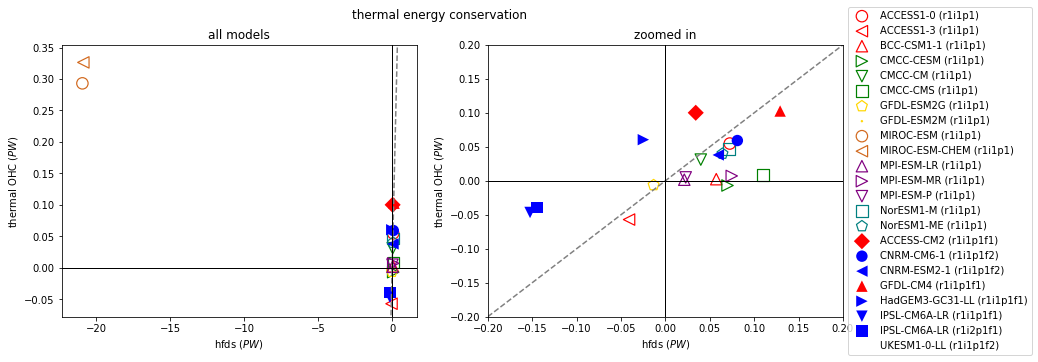

In [5]:
plot_comparison(df, 'thermal energy conservation', 'hfds (J yr-1)', 'thermal OHC (J yr-1)', 'PW',
                shading=False, zoom=[-0.2, 0.2])

Below the 1:1 line indicates that the ocean model is losing heat.

Within the shaded area means the drift in surface forcing is greater than the internally generated ocean model drift.

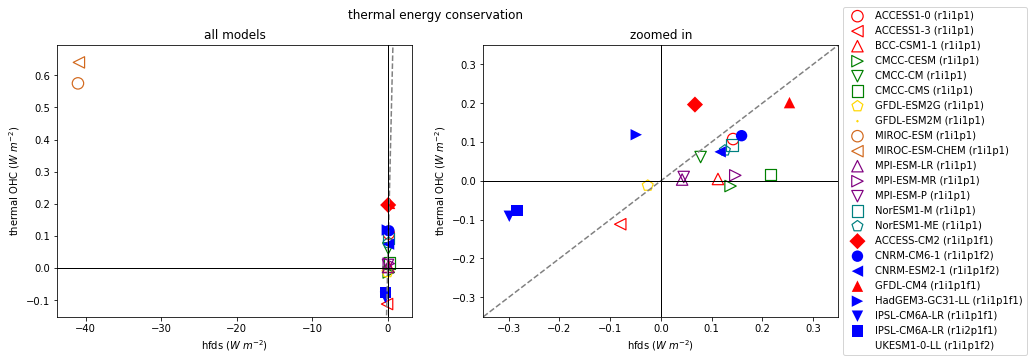

In [6]:
plot_comparison(df, 'thermal energy conservation', 'hfds (J yr-1)', 'thermal OHC (J yr-1)', 'W m-2',
                shading=False, zoom=[-0.35, 0.35], outfile='thermal_conservation.png')

The planetary energy imbalance associated with climate change is 0.5 - 1.0 $W m^{-2}$.

### After dedrifting

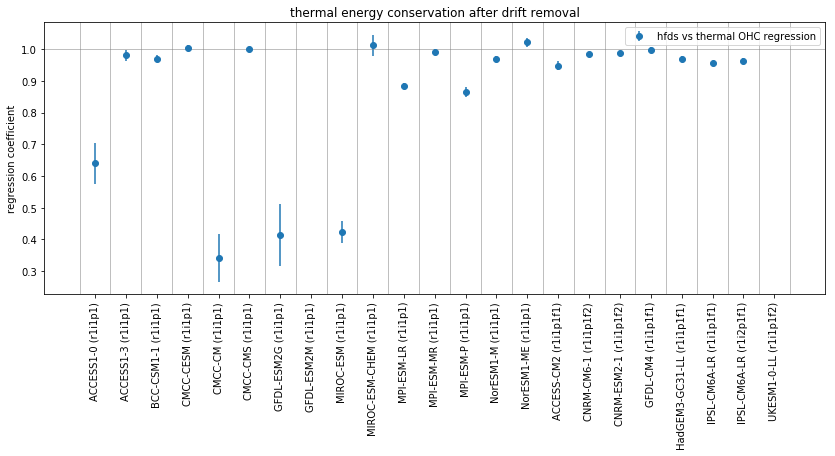

In [7]:
plot_regression_coefficients(df, ['hfds vs thermal OHC regression'],
                             'thermal energy conservation after drift removal',
                             outfile='thermal_regression.png')

## Mass

### Before dedrifting

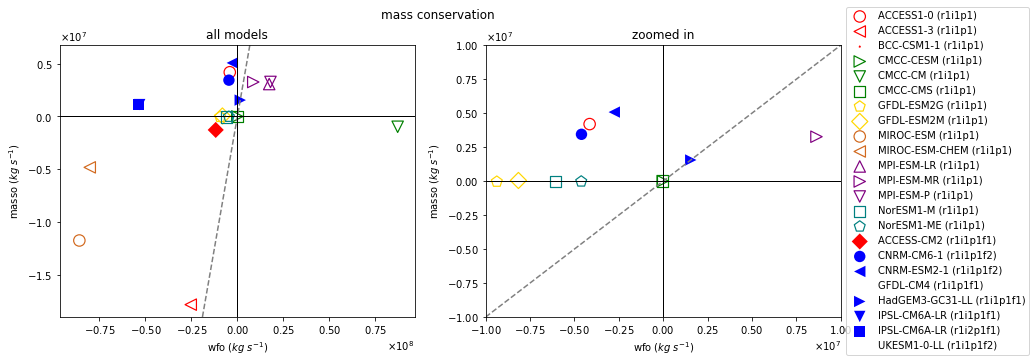

In [8]:
plot_comparison(df, 'mass conservation', 'wfo (kg yr-1)', 'masso (kg yr-1)', 'kg s-1',
                scinotation=True, shading=False, zoom=[-1e7, 1e7])

Below the 1:1 line indicates that the ocean model is losing mass.

Within the shaded area means the drift in surface forcing is greater than the internally generated ocean model drift.

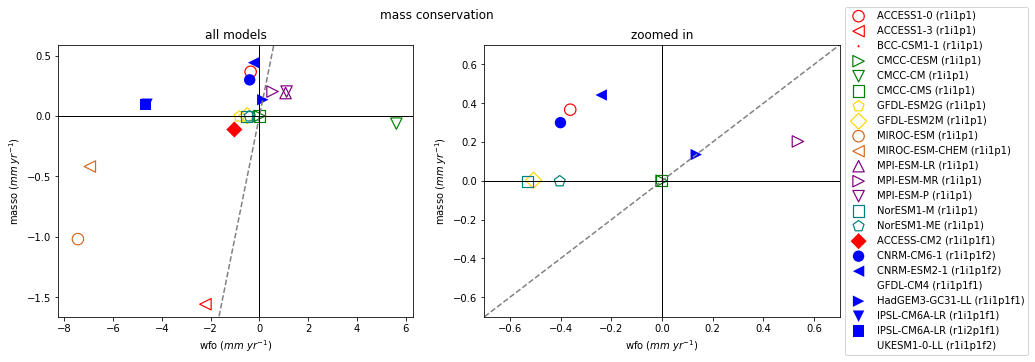

In [9]:
plot_comparison(df, 'mass conservation', 'wfo (kg yr-1)', 'masso (kg yr-1)', 'mm yr-1',
                shading=False, zoom=[-0.7, 0.7], outfile='mass_conservation.png')

The [current rate](https://climate.nasa.gov/news/2680/new-study-finds-sea-level-rise-accelerating/) of global mean sea level rise is 3.4 mm/year.

An alternative unit for comparison (which has the advantage of avoiding using the global ocean area, which is different for different models) might be Gt/year (to compare with Antarctic and/or Greenland melt rates). 

### After dedrifting

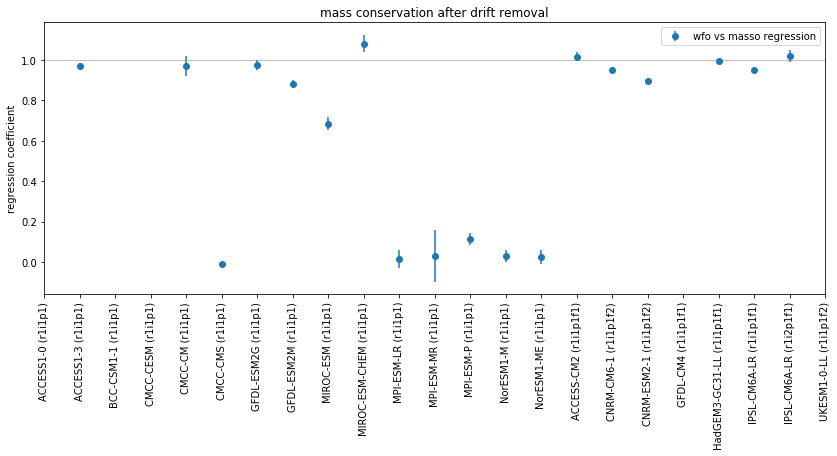

In [10]:
plot_regression_coefficients(df, ['wfo vs masso regression'],
                             'mass conservation after drift removal')

## Salt

### Before dedrifting

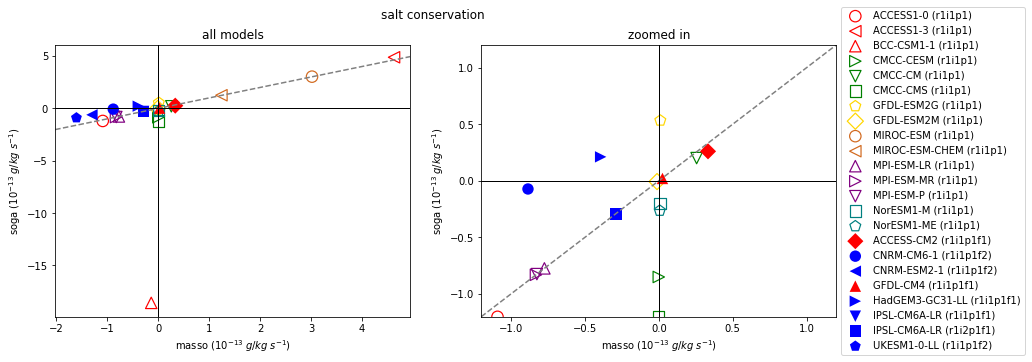

In [11]:
plot_comparison(df, 'salt conservation', 'masso (g/kg yr-1)', 'soga (g/kg yr-1)', 'g/kg s-1',
                scale_factor=13, zoom=[-1.2, 1.2], outfile='salt_conservation.png')

Above the 1:1 line indicates that the ocean model is losing salt.

### After dedrifting

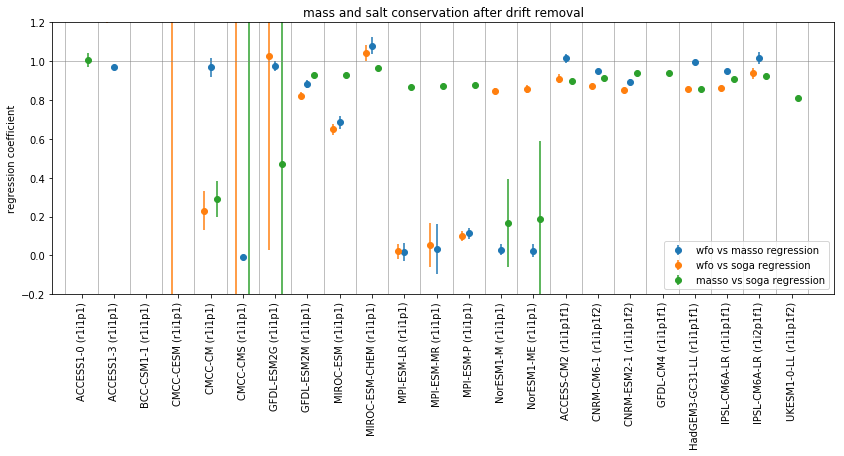

In [41]:
plot_regression_coefficients(df, ['wfo vs masso regression', 'wfo vs soga regression', 'masso vs soga regression'],
                             'mass and salt conservation after drift removal',
                             outfile='mass_regression.png', ylim=[-0.2, 1.2])

## TOA

### Before dedrifting

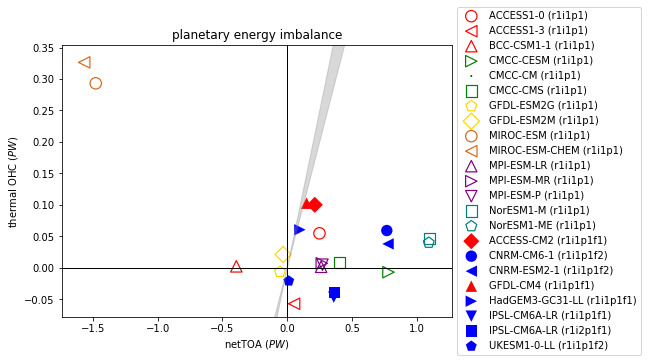

In [13]:
plot_comparison(df, 'planetary energy imbalance', 'netTOA (J yr-1)', 'thermal OHC (J yr-1)', 'PW')

Grey shading shows the region where $\delta H / \delta t$ = 80-100% of netTOA. Below that regions indicated that the model is losing energy between the top of the atmosphere and ocean (most models lose heat).

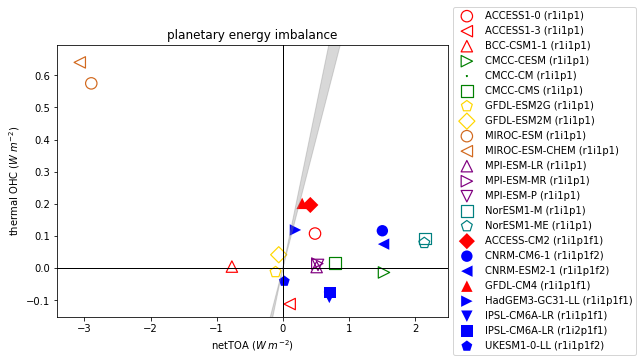

In [14]:
plot_comparison(df, 'planetary energy imbalance', 'netTOA (J yr-1)', 'thermal OHC (J yr-1)', 'W m-2',
                outfile='eei_conservation.png')

The planetary energy imbalance associated with climate change is 0.5 - 1.0 $W m^{-2}$.

### After dedrifting

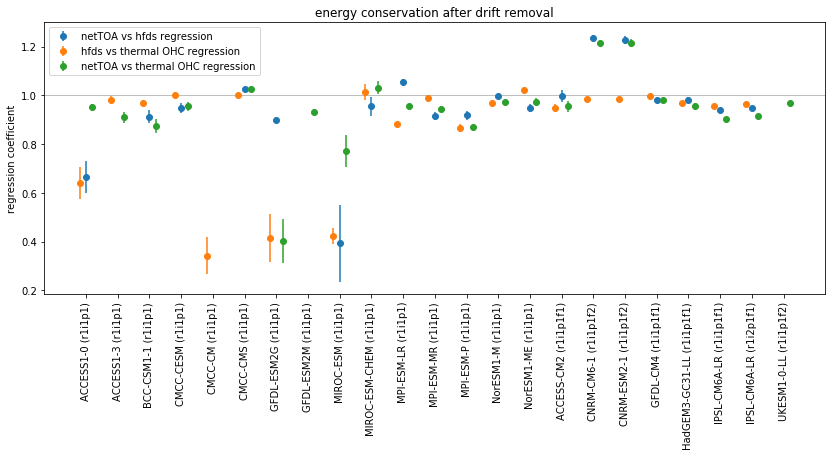

In [15]:
plot_regression_coefficients(df, ['netTOA vs hfds regression', 'hfds vs thermal OHC regression', 'netTOA vs thermal OHC regression'],
                             'energy conservation after drift removal', outfile='eei_regression.png')

## Barystatic sea level

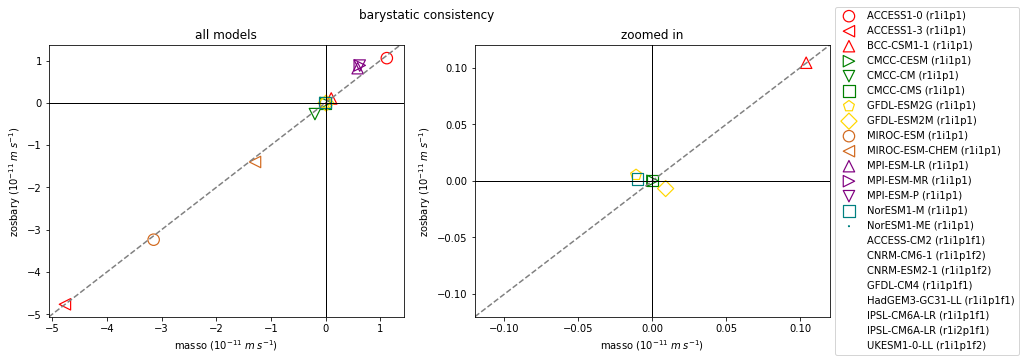

In [16]:
plot_comparison(df, 'barystatic consistency', 'masso (m yr-1)', 'zosbary (m yr-1)', 'm s-1',
                scale_factor=11, zoom=[-0.12, 0.12])

## Contributions to OHC drift

OHC drift is dominated by the thermal (as opposed to barystatic) component.

In [17]:
df_ohc = df[['OHC (J yr-1)', 'thermal OHC (J yr-1)', 'barystatic OHC (J yr-1)']]
df_ohc.set_index(df['model'] + ' (' + df['run'] + ')', drop=True, inplace=True)

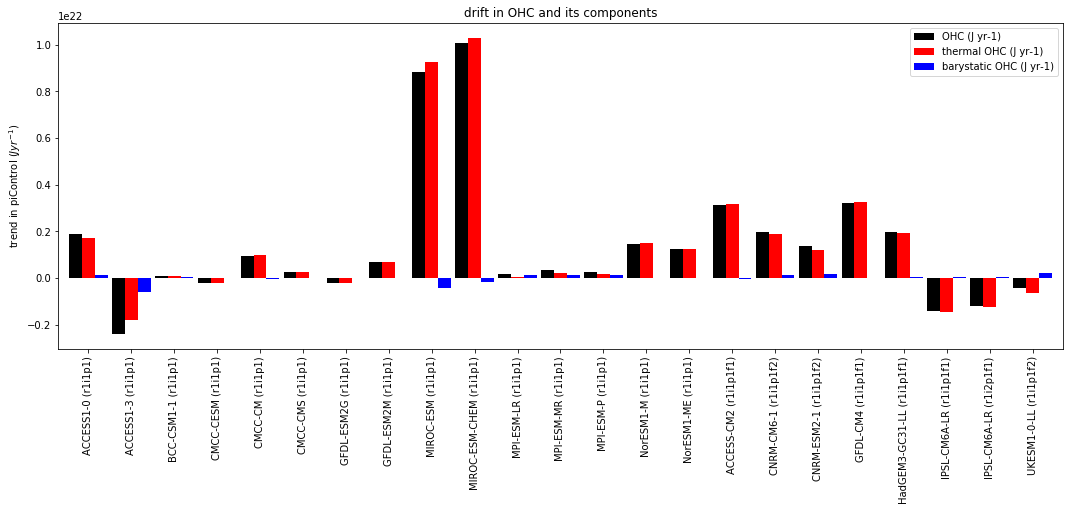

In [18]:
df_ohc.plot.bar(figsize=(18,6), color=['black', 'red', 'blue'], width=0.9)
plt.title('drift in OHC and its components')
plt.ylabel('trend in piControl ($J yr^{-1}$)')
plt.savefig('ohc_drift_breakdown.png', bbox_inches='tight', dpi=400)
#plt.show()

In [19]:
(df_ohc['thermal OHC (J yr-1)'] / df_ohc['OHC (J yr-1)'] ) * 100

ACCESS1-0 (r1i1p1)             92.021277
ACCESS1-3 (r1i1p1)             74.380165
BCC-CSM1-1 (r1i1p1)            79.914984
CMCC-CESM (r1i1p1)            100.000000
CMCC-CM (r1i1p1)              103.575184
CMCC-CMS (r1i1p1)             100.000000
GFDL-ESM2G (r1i1p1)            99.500000
GFDL-ESM2M (r1i1p1)            99.701937
MIROC-ESM (r1i1p1)            104.638009
MIROC-ESM-CHEM (r1i1p1)       101.980198
MPI-ESM-LR (r1i1p1)            32.802548
MPI-ESM-MR (r1i1p1)            66.470588
MPI-ESM-P (r1i1p1)             57.875458
NorESM1-M (r1i1p1)            100.680272
NorESM1-ME (r1i1p1)           100.000000
ACCESS-CM2 (r1i1p1f1)         101.607717
CNRM-CM6-1 (r1i1p1f2)          93.969849
CNRM-ESM2-1 (r1i1p1f2)         86.956522
GFDL-CM4 (r1i1p1f1)           100.309598
HadGEM3-GC31-LL (r1i1p1f1)     96.954315
IPSL-CM6A-LR (r1i1p1f1)       102.797203
IPSL-CM6A-LR (r1i2p1f1)       103.361345
UKESM1-0-LL (r1i1p1f2)        150.917431
dtype: float64

## Contributions to coupled model energy leakage

Coupled model energy leakage is dominated by the atmospheric / out-of-ocean-model leakage.

In [20]:
df['atmos energy leakage (J yr-1)'] = df['netTOA (J yr-1)'] - df['hfds (J yr-1)']
df['ocean energy leakage (J yr-1)'] = df['hfds (J yr-1)'] - df['thermal OHC (J yr-1)']
df['total energy leakage (J yr-1)'] = df['netTOA (J yr-1)'] - df['thermal OHC (J yr-1)']

In [21]:
df_leakage = df[['total energy leakage (J yr-1)', 'atmos energy leakage (J yr-1)', 'ocean energy leakage (J yr-1)']]
df_leakage.set_index(df['model'] + ' (' + df['run'] + ')', drop=True, inplace=True)

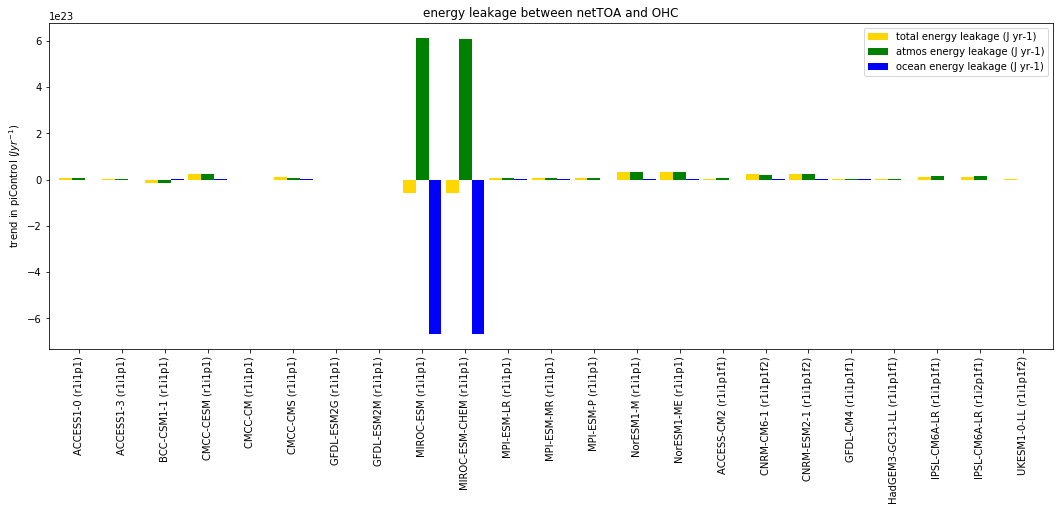

In [22]:
df_leakage.plot.bar(figsize=(18,6), color=['gold', 'green', 'blue'], width=0.9)
plt.title('energy leakage between netTOA and OHC')
plt.ylabel('trend in piControl ($J yr^{-1}$)')
plt.savefig('eei_leakage_breakdown.png', bbox_inches='tight', dpi=400)
#plt.show()

In [61]:
(df_leakage['atmos energy leakage (J yr-1)'] / df_leakage['total energy leakage (J yr-1)']) * 100

ACCESS1-0 (r1i1p1)              90.804598
ACCESS1-3 (r1i1p1)              85.217391
BCC-CSM1-1 (r1i1p1)            113.905989
CMCC-CESM (r1i1p1)              90.216778
CMCC-CM (r1i1p1)                      NaN
CMCC-CMS (r1i1p1)               74.220006
GFDL-ESM2G (r1i1p1)             86.148008
GFDL-ESM2M (r1i1p1)                   NaN
MIROC-ESM (r1i1p1)           -1098.299015
MIROC-ESM-CHEM (r1i1p1)      -1019.430486
MPI-ESM-LR (r1i1p1)             92.391504
MPI-ESM-MR (r1i1p1)             73.828796
MPI-ESM-P (r1i1p1)              93.255481
NorESM1-M (r1i1p1)              97.644928
NorESM1-ME (r1i1p1)             97.676524
ACCESS-CM2 (r1i1p1f1)          159.375000
CNRM-CM6-1 (r1i1p1f2)           96.909987
CNRM-ESM2-1 (r1i1p1f2)          97.081545
GFDL-CM4 (r1i1p1f1)             42.068966
HadGEM3-GC31-LL (r1i1p1f1)     334.086957
IPSL-CM6A-LR (r1i1p1f1)        126.155051
IPSL-CM6A-LR (r1i2p1f1)        126.158680
UKESM1-0-LL (r1i1p1f2)                NaN
dtype: float64

## TODO (*italics maybe*, solid definitely)

- H and M timeseries (decadal mean, with and without linear trend removed)
- Putting the drift in context:
  - Versus observations: EEI ($W \; m^{-2}$), sea level rise (mm / year), Antarctic/Greenland melt rates (Gt / year)  
  - Versus forced experiments: historical, SSPs, 1pctCO2
- *Scatter: steric components from CMIP5 models that don't report Boussinesq mass?*
- Correlations (do regression coefficient like Will instead - requires correct phase and amplitude)
  - *Might also be worth looking at whether dedrifted forced changes are consistent between key variables (i.e. their natural variability might be out of sync but not their forced changes?)*
- *TCR*
- *pattern amplification*